In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
train_df = pd.read_csv('/kaggle/input/cci-summit/train.csv')
test_df = pd.read_csv('/kaggle/input/cci-summit/test.csv')

In [3]:
train_df['income'] = train_df['income'].map(lambda x: 1 if x == '>50K' else 0)

In [4]:
train_df.head()

,ID,Tahun Kelahiran,Kelas Pekerjaan,fnlwgt,Pendidikan,Jenjang Pendidikan,Status,Pekerjaan,Hubungan,Etnis,sex,pendapatan,pengeluaran,hours per week,Asal Negara,jumlah_anak,income
0,478,1992,Swasta,37210,Sarjana,Sarjana,Menikah,Eksekutif Manager,Suami,1,Male,0,0,45,United-States,2,1
1,479,1981,Swasta,101950,Magister,Magister,Belum-menikah,Eksekutif Manager,Tidak dalam Keluarga,1,Female,0,0,45,United-States,0,0
2,480,2004,NaN,122244,SMA Grad,SMA Grad,Belum-menikah,NaN,Tidak dalam Keluarga,1,Female,0,0,28,United-States,0,0
3,481,1984,Pemerintah daerah,24763,Diploma,Kuliah,Cerai,Transportasi dan Pengangkutan,Belum Menikah,1,Male,6849,0,40,United-States,0,0
4,482,2000,Swasta,113936,Sarjana,Sarjana,Belum-menikah,Spesialis Profesional,Punya Anak,1,Male,0,0,40,United-States,0,0


In [5]:
train_df.shape

(26069, 17)

In [6]:
# Replace '?' with NaN and handle missing values
train_df.replace('?', np.nan, inplace=True)
test_df.replace('?', np.nan, inplace=True)

In [7]:
train_df.isnull().sum()

ID                       0
Tahun Kelahiran          0
Kelas Pekerjaan       1475
fnlwgt                   0
Pendidikan               0
Jenjang Pendidikan       0
Status                   0
Pekerjaan             1481
Hubungan                 0
Etnis                    0
sex                      0
pendapatan               0
pengeluaran              0
hours per week           0
Asal Negara            458
jumlah_anak              0
income                   0
dtype: int64

In [8]:
test_df.isnull().sum()

ID                      0
Tahun Kelahiran         0
Kelas Pekerjaan       363
fnlwgt                  0
Pendidikan              0
Jenjang Pendidikan      0
Status                  0
Pekerjaan             364
Hubungan                0
Etnis                   0
sex                     0
pendapatan              0
pengeluaran             0
hours per week          0
Asal Negara           125
jumlah_anak             0
dtype: int64

In [9]:
# Impute missing values in categorical columns with the most frequent value
cat_cols = ['Kelas Pekerjaan', 'Pekerjaan', 'Asal Negara']
imputer = SimpleImputer(strategy='most_frequent')

train_df[cat_cols] = imputer.fit_transform(train_df[cat_cols])
test_df[cat_cols] = imputer.transform(test_df[cat_cols])

In [10]:
train_df.isnull().sum()

ID                    0
Tahun Kelahiran       0
Kelas Pekerjaan       0
fnlwgt                0
Pendidikan            0
Jenjang Pendidikan    0
Status                0
Pekerjaan             0
Hubungan              0
Etnis                 0
sex                   0
pendapatan            0
pengeluaran           0
hours per week        0
Asal Negara           0
jumlah_anak           0
income                0
dtype: int64

In [11]:
test_df.isnull().sum()

ID                    0
Tahun Kelahiran       0
Kelas Pekerjaan       0
fnlwgt                0
Pendidikan            0
Jenjang Pendidikan    0
Status                0
Pekerjaan             0
Hubungan              0
Etnis                 0
sex                   0
pendapatan            0
pengeluaran           0
hours per week        0
Asal Negara           0
jumlah_anak           0
dtype: int64

In [12]:
X = train_df.drop(columns=['income'])
y = train_df['income']

# Encoding categorical columns
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [13]:
# Scaling numeric columns
scaler = StandardScaler()
X[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))

In [14]:
# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

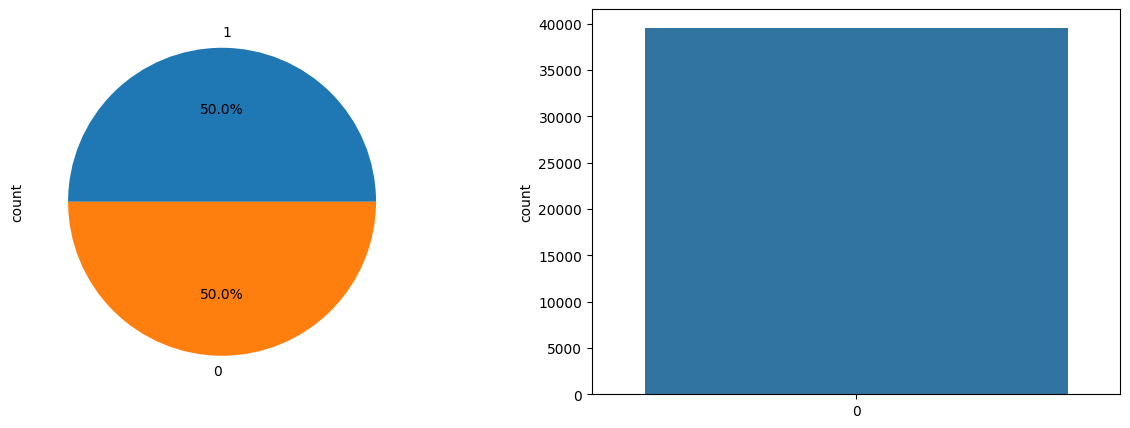

income
1    19790
0    19790
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1, 2, 2)
sns.countplot(y_resampled)
plt.show()
y_resampled.value_counts()

In [ ]:
# 3. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definisikan model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search yang lebih dikerucutkan
param_grid = {
    'n_estimators': [100, 200, 300],            # Membatasi jumlah pohon untuk mempercepat
    'max_depth': [6, 10],                  # Pilihan lebih kecil untuk kedalaman maksimum
    'learning_rate': [0.01, 0.1],          # Fokus pada range umum yang bekerja dengan baik
    'subsample': [0.8, 1.0],               # Fokus pada dua nilai untuk subsampling
    'colsample_bytree': [0.8, 1.0],        # Sama untuk fitur subsampling
    'gamma': [0, 0.1],                     # Menyederhanakan gamma untuk mengurangi split kecil
    'min_child_weight': [1, 5],            # Menyederhanakan untuk mengurangi eksplorasi yang berlebihan
    'reg_alpha': [0, 0.1],                 # Regularisasi L1 yang lebih ringan
    'reg_lambda': [1, 10],                 # Regularisasi L2 yang lebih luas
}



# Definisikan GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)


In [ ]:
xgb_model = xgb.XGBClassifier(colsample_bytree= 0.8, learning_rate=0.1, max_depth= 10, n_estimators= 300, subsample=1.0)
xgb_model.fit(X_train, y_train)

In [ ]:
# 5. Validation and Evaluation

y_pred = xgb_model.predict(X_val)

print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification report:\n", classification_report(y_val, y_pred))


In [ ]:
 #6. Preprocess test data and make predictions
test_df_encoded = test_df.copy()

# Encode test set using the same encoders as train set
for column, le in label_encoders.items():
    test_df_encoded[column] = le.transform(test_df_encoded[column].astype(str))

# Scale test data using the same scaler as the train set
test_df_encoded[test_df_encoded.select_dtypes(include=['int64', 'float64']).columns] = scaler.transform(
    test_df_encoded.select_dtypes(include=['int64', 'float64']))

# Predict on test data
test_predictions = xgb_model.predict(test_df_encoded)

In [ ]:
test_df.head()

In [ ]:
# Save the predictions to a CSV file
test_df['income'] = test_predictions
test_df[['ID', 'income']].to_csv('/kaggle/working/test_prediction3.csv', index=False)